<a href="https://colab.research.google.com/github/Victorcorcos/winning-investments/blob/main/WinningInvestmentsBacktest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winning Investments 🥇

Aqui temos backtests de um sistema em Python que aplica no Brasil as estratégias e técnicas desenvolvidas pelos maiores investidores em ações. 🥋

https://github.com/Victorcorcos/winning-investments

No momento, estratégias dos seguintes grandes investidores podem ser aplicadas:
1. **Benjamin Graham**
2. **Joel Greenblatt**
3. **Décio Bazin**
4. **Joseph D. Piotroski**


# Contato ✉️ 

Victor Cordeiro Costa

* victorcorcos@gmail.com
* victor.costa@oxeanbits.com

# 1. Importando Blibliotecas

In [3]:
!pip install yfinance --upgrade --no-cache-dir
!pip install git+https://github.com/quantopian/pyfolio

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
import pyfolio as pf

import click
import time

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-535ier8a
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-535ier8a
     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp36-none-any.whl size=75764 sha256=3782a9ac4b98807c87ac1b1cb3032f289c5273f3e3432532684342fccc09e626
  Stored in directory: /tmp/pip-ephem-wheel-cache-xek26hwz/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
  Created wheel for empyrical: filename=empyrical-0.5.5-cp36-none-any.whl size=39763 sha256=5aca9ecd4b48a4546b366be980e1a38945a91d5a522e98235a7fcafe45a075ab
  Stored in directory: /root/.cache/pip/wheels/ea/b2/c8/6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc
Successfully built pyfolio empyrical


# 2. Criando método específico para rodar backtests

Aqui foi considerado um investimento de R$ 1.000,00 em cada uma das ações.

In [15]:
# Replace dots to commas in a string R$4000.00 => R$4000,00
def commalize(value):
  return value.replace('.', ',')

# Returns one year after the start date
def next_year(start):
  return str(int(start[:4]) + 1) + start[4:]

# Core method to execute the backtest from the provided start...end range and using the provided tickers
# The default value for end is the today's date
# Usage...
# run(start='2015-04-05', tickers=['ABEV3', 'EGIE3', 'WEGE3', 'ITUB3', 'MDIA3', 'GRND3', 'ODPV3', 'ENBR3', 'PSSA3', 'FLRY3'])
# run(start='2015-04-05', end='2016-04-05', tickers=['ABEV3', 'EGIE3', 'WEGE3', 'ITUB3', 'MDIA3', 'GRND3', 'ODPV3', 'ENBR3', 'PSSA3', 'FLRY3'])
def run(tickers, start, end=time.strftime("%Y-%m-%d"), display=False):
  # end = next_year(start) # Used to execute 1-year backtest
  tickers = list(map(lambda t: t + '.SA', tickers)) # Add '.SA' on the ending of the tickers
  tickers += ['^BVSP'] # Add Ibovespa index to tickers
  
  # Bring the daily tickers prices from the provided period until today
  dados_yahoo = yf.download(tickers=tickers, start=start, end=end)['Adj Close']
  
  # Calculate the percentage of DAILY return
  retorno = dados_yahoo.pct_change()
  retorno.iloc[0] = 0
  
  # Calculate the percentage of ACCUMULATED return
  retorno_acumulado = (1 + retorno).cumprod()
  
  # Execute the Backtest investing R$1.000,00 on each ticker
  carteira = 1000 * retorno_acumulado.iloc[:, :(len(tickers)-1)] # Take out the Stocks index column
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['retorno'] = carteira['saldo'].pct_change()
  
  # Bring how much money would you have today by investing R$1.000,00 on the tickers
  montante = carteira.tail(1)['saldo'][0]
  click.secho(f"\nValorizações na Carteira...\n {carteira}", fg='blue', bg='white', bold=True)
  click.secho(f"Montante Inicial: 10.000,00", fg='red', bold=True)
  click.secho(f"Montante Final: {commalize(str(montante))}", fg='blue', bold=True)
  click.secho(f"Valorização: {'{0:.0%}'.format((montante - 10000) / 10000)}", fg='green', bold=True)
  if (not display): return

  # Beautifully plots the result on the screen
  pf.create_returns_tear_sheet(carteira['retorno'], benchmark_rets=retorno['^BVSP'])

# 3. Salvando as Carteiras para Backtests

Essas carteiras foram construídas com as 10 melhores ações de determinada época passada (2008, 2009, 2010, 2011, ...) considerando as estratégias desses grandes investidores:

1. [Benjamin Graham](https://github.com/Victorcorcos/winning-investments#benjamin-graham-)
2. [Joel Greenblatt](https://github.com/Victorcorcos/winning-investments#joel-greenblatt-)
3. [Décio Bazin](https://github.com/Victorcorcos/winning-investments#d%C3%A9cio-bazin-)
4. [Joseph D. Piotroski](https://github.com/Victorcorcos/winning-investments#joseph-d-piotroski-)

São resultados diretos adquiridos ao rodar os algoritmos principais do [**Winning Investments** ®](https://github.com/Victorcorcos/winning-investments), que são:

```rb
python3 graham.py "{ 'year': ANO_INICIAL_DO_BACKTEST }"
```

```rb
python3 greenblatt.py "{ 'year': ANO_INICIAL_DO_BACKTEST }"
```

```rb
python3 bazin.py "{ 'year': ANO_INICIAL_DO_BACKTEST }"
```

```rb
python3 piotroski.py "{ 'year': ANO_INICIAL_DO_BACKTEST }"
```





In [5]:
graham_2008 = ['ELET6', 'BRGE6', 'CPLE3', 'CPLE6', 'CSMG3', 'BRGE7', 'BRGE8', 'BRGE12', 'BRGE3', 'SAPR4']
graham_2009 = ['FESA4', 'CSMG3', 'USIM3', 'BRAP3', 'PEAB3', 'PEAB4', 'SAPR4', 'PATI4', 'CPLE3', 'CPLE6']
graham_2010 = ['CSMG3', 'EQTL3', 'CTSA4', 'CTSA3', 'SBSP3', 'BRGE3', 'BRGE6', 'BSLI3', 'BGIP3', 'BGIP4']
graham_2011 = ['BMEB4', 'BMEB3', 'BSLI3', 'WHRL3', 'WHRL4', 'ELET3', 'CTSA3', 'CTSA4', 'CSMG3', 'SBSP3']
graham_2012 = ['CPLE3', 'BBAS3', 'PETR4', 'RAPT3', 'VALE3', 'CMIG3', 'ECPR3', 'ECPR4', 'CTSA3', 'CTSA4']
graham_2013 = ['DOHL4', 'CTSA4', 'CESP3', 'CTSA3', 'BRSR3', 'BBAS3', 'CMIG3', 'BNBR3', 'CMIG4', 'VALE3']
graham_2014 = ['BBAS3', 'BNBR3', 'SOND6', 'SOND5', 'CTSA3', 'CTSA4', 'CMIG4', 'CMIG3', 'BRSR3', 'SAPR4']
graham_2015 = ['EZTC3', 'EVEN3', 'DOHL4', 'MRVE3', 'SAPR4', 'CMIG4', 'CMIG3', 'VIVT3', 'ETER3', 'BRSR3']
graham_2016 = ['ITSA4', 'ITSA3', 'ITUB3', 'CMIG4', 'CMIG3', 'BBAS3', 'CGRA4', 'CGRA3', 'EZTC3', 'TAEE11']
graham_2017 = ['TRPL3', 'TRPL4', 'BNBR3', 'BSLI4', 'CGRA3', 'CGRA4', 'BMIN4', 'SAPR3', 'BEES3', 'BEES4']
graham_2018 = ['BNBR3', 'TRPL3', 'TRPL4', 'ABCB4', 'BEES3', 'BEES4', 'CCPR3', 'SAPR4', 'FESA3', 'FESA4']
graham_2019 = ['FESA4', 'TRPL3', 'TRPL4', 'BNBR3', 'BPAR3', 'FESA3', 'MRVE3', 'VIVT3', 'BRSR3', 'NAFG3']

bazin_2008 = ['CSAB3', 'CSAB4', 'SULT3', 'SULT4', 'TRPL3', 'TRPL4', 'VIVT3', 'VIVT4', 'GRND3', 'SANB4']
bazin_2009 = ['GRND3', 'FESA4', 'LREN3', 'PATI4', 'POSI3', 'ETER3', 'SOND3', 'IGTA3', 'TKNO4', 'POMO3']
bazin_2010 = ['CTSA4', 'JHSF3', 'PEAB4', 'PEAB3', 'WHRL4', 'WHRL3', 'CRIV4', 'CTSA3', 'BGIP4', 'EKTR4']
bazin_2011 = ['WHRL3', 'WHRL4', 'ODPV3', 'SOND3', 'ELET3', 'BGIP4', 'PATI4', 'ETER3', 'CSAB3', 'CSAB4']
bazin_2012 = ['PATI4', 'GRND3', 'MERC4', 'ETER3', 'CGRA3', 'CGRA4', 'BGIP4', 'BGIP3', 'NAFG4', 'BBAS3']
bazin_2013 = ['PATI4', 'ETER3', 'BGIP3', 'BGIP4', 'BEES4', 'WHRL4', 'WHRL3', 'GRND3', 'CMIG3', 'BRIV4']
bazin_2014 = ['BRIV4', 'PINE4', 'BBAS3', 'GUAR3', 'WHRL4', 'ELET3', 'WHRL3', 'ENGI4', 'ENGI3', 'CRIV4']
bazin_2015 = ['CRIV4', 'PINE4', 'SAPR4', 'BBAS3', 'BEES4', 'BEES3', 'DOHL4', 'WHRL4', 'WHRL3', 'BMEB4']
bazin_2016 = ['BBSE3', 'CRIV4', 'ITSA4', 'BRIV4', 'ITSA3', 'FESA4', 'BBAS3', 'CGRA4', 'CGRA3', 'EZTC3']
bazin_2017 = ['CRIV4', 'BRIV4', 'ITSA4', 'FESA4', 'CGRA4', 'CGRA3', 'BMEB4', 'AFLT3', 'MERC4', 'LCAM3']
bazin_2018 = ['CRIV4', 'BRIV4', 'HGTX3', 'CGRA4', 'CGRA3', 'CSAB4', 'CSAB3', 'BMEB4', 'AFLT3', 'TRIS3']
bazin_2019 = ['CRIV4', 'BRIV4', 'ITSA4', 'ITSA3', 'ITUB3', 'BBSE3', 'BMEB4', 'PTNT4', 'TRIS3', 'GRND3']

greenblatt_2008 = ['CEBR5', 'CEBR6', 'CEBR3', 'CEEB3', 'ENGI4', 'ENGI3', 'FBMC4', 'TIET4', 'VIVT4', 'WHRL3']
greenblatt_2009 = ['FESA4', 'CEBR6', 'CEBR3', 'CEBR5', 'GGBR4', 'MYPK3', 'FBMC4', 'RAPT3', 'RAPT4', 'LPSB3']
greenblatt_2010 = ['TIET3', 'TIET4', 'ETER3', 'EKTR4', 'SCAR3', 'SOND5', 'SOND6', 'GRND3', 'CGAS3', 'WEGE3']
greenblatt_2011 = ['COCE3', 'COCE5', 'CEEB5', 'WHRL3', 'CAMB4', 'CIEL3', 'TIET3', 'CGAS3', 'WHRL4', 'CEEB3']
greenblatt_2012 = ['AELP3', 'FHER3', 'VALE5', 'VALE3', 'COCE3', 'COCE5', 'RAPT3', 'CSNA3', 'RAPT4', 'TAEE11']
greenblatt_2013 = ['WHRL3', 'WHRL4', 'TIET3', 'TIET4', 'ETER3', 'CSRN5', 'COCE5', 'COCE3', 'CMIG3', 'TRPL4']
greenblatt_2014 = ['SOND5', 'BAUH4', 'WHRL3', 'WHRL4', 'TIET3', 'TIET4', 'ETER3', 'CMIG4', 'CMIG3', 'PTBL3']
greenblatt_2015 = ['OGXP3', 'WHRL3', 'WHRL4', 'VVAR3', 'TIET3', 'CMIG4', 'PSSA3', 'CMIG3', 'TIET4', 'PTBL3']
greenblatt_2016 = ['AGRO3', 'PTBL3', 'CMIG4', 'CMIG3', 'SEER3', 'BRKM3', 'EQTL3', 'COCE5', 'PMAM3', 'VVAR3']
greenblatt_2017 = ['TRPL3', 'TRPL4', 'MSPA4', 'CGAS3', 'CGAS5', 'BAUH4', 'BRKM3', 'BRKM5', 'BEEF3', 'SMLS3']
greenblatt_2018 = ['IDNT3', 'BAUH4', 'UNIP6', 'UNIP5', 'UNIP3', 'WIZS3', 'PSSA3', 'CRPG6', 'FESA4', 'CRPG5']
greenblatt_2019 = ['WIZS3', 'UNIP6', 'UNIP5', 'UNIP3', 'CRPG6', 'CRPG5', 'AGRO3', 'SMLS3', 'CIEL3', 'BAUH4']

piotroski_2008 = ['BMIN4', 'BMIN3', 'BAZA3', 'SAPR4', 'CRIV4', 'CRIV3', 'ETER3', 'JBSS3', 'MERC4', 'ITSA4']
piotroski_2009 = ['BBRK3', 'LAME3', 'LAME4', 'MULT3', 'BBDC3', 'COCE3', 'BBDC4', 'COCE6', 'COCE5', 'ELET6']
piotroski_2010 = ['BAZA3', 'SPRI3', 'KLBN4', 'KLBN3', 'ELEK4', 'TGMA3', 'ELEK3', 'RANI3', 'RANI4', 'MYPK3']
piotroski_2011 = ['TCNO4', 'TCNO3', 'FHER3', 'CESP3', 'EKTR4', 'CESP5', 'SMTO3', 'EKTR3', 'CESP6', 'CEDO4']
piotroski_2012 = ['MTSA4', 'TOTS3', 'KEPL3', 'UNIP6', 'UNIP3', 'UNIP5', 'DTCY3', 'CBEE3', 'CTSA3', 'CTSA4']
piotroski_2013 = ['SHUL4', 'VVAR3', 'CLSC4', 'CLSC3', 'BRFS3', 'MNDL3', 'TXRX3', 'TRIS3', 'WHRL3', 'WHRL4']
piotroski_2014 = ['CESP3', 'CESP6', 'CESP5', 'MULT3', 'PTNT4', 'CARD3', 'JBSS3', 'NAFG4', 'HYPE3', 'CEPE5']
piotroski_2015 = ['CARD3', 'BMIN4', 'ENEV3', 'GFSA3', 'SHOW3', 'ENGI3', 'BRGE11', 'ENGI4', 'BRGE3', 'BRGE8']
piotroski_2016 = ['VULC3', 'FRIO3', 'CARD3', 'SEER3', 'ALUP11', 'MDIA3', 'MGEL4', 'LOGN3', 'SAPR4', 'SAPR3']
piotroski_2017 = ['VULC3', 'MTSA4', 'NAFG4', 'ENEV3', 'ANIM3', 'NAFG3', 'TEND3', 'YDUQ3', 'SLCE3', 'IGTA3']
piotroski_2018 = ['CESP3', 'WIZS3', 'LAME3', 'CESP6', 'CPRE3', 'CRFB3', 'LAME4', 'VLID3', 'TUPY3', 'TEND3']
piotroski_2019 = ['BEEF3', 'EVEN3', 'RAPT3', 'RAPT4', 'KEPL3', 'WEGE3', 'BAZA3', 'CPLE3', 'CPLE6', 'CSMG3']


# 4. Mapeando Anos para Datas

Essas foram as datas descolhidas para cada ano e utilizadas como ponto de partida para cada um dos backtests.

Elas foram escolhidas dessa forma por existir uma maneira de capturar a situação dos indicadores fundamentalistas nessas datas.

Basicamente foi utilizado o site www.fundamentus.com.br e o Time Back Machine.
[link text](https://)

In [8]:
year = {
  2008: '2008-06-13', # https://web.archive.org/web/20080613050801/http://www.fundamentus.com.br/resultado.php 
  2009: '2009-01-23', # https://web.archive.org/web/20090123022224/http://www.fundamentus.com.br/resultado.php 
  2010: '2010-01-15', # https://web.archive.org/web/20100115191626/http://www.fundamentus.com.br/resultado.php 
  2011: '2011-01-13', # https://web.archive.org/web/20110113192117/http://www.fundamentus.com.br/resultado.php 
  2012: '2012-01-06', # https://web.archive.org/web/20120106023830/http://www.fundamentus.com.br/resultado.php 
  2013: '2013-01-05', # https://web.archive.org/web/20130105004012/http://www.fundamentus.com.br/resultado.php 
  2014: '2014-01-08', # https://web.archive.org/web/20140108164618/http://www.fundamentus.com.br/resultado.php 
  2015: '2015-01-19', # https://web.archive.org/web/20150119231047/http://www.fundamentus.com.br/resultado.php 
  2016: '2016-01-06', # https://web.archive.org/web/20160106101916/http://www.fundamentus.com.br/resultado.php 
  2017: '2017-05-05', # https://web.archive.org/web/20170505164235/http://www.fundamentus.com.br/resultado.php 
  2018: '2018-01-05', # https://web.archive.org/web/20180105120409/http://www.fundamentus.com.br/resultado.php 
  2019: '2019-01-02'  # https://web.archive.org/web/20190102202956/http://www.fundamentus.com.br/resultado.php
}

# 5. Executando Backtests

Basta executar o método `run()` passando os seguintes parâmetros

1. Data de início (`start`)
2. A carteira (`tickers`)
3. Avisando que é para mostrar o resultado gráfico (`display=True`)

## 5.1. Benjamin Graham

In [ ]:
run(start=year[2008], tickers=graham_2008, display=True)

[*********************100%***********************]  11 of 11 completed

Valorizações na Carteira...
                BRAP3.SA     CPLE3.SA  ...         saldo   retorno
Date                                  ...                        
2009-01-23  1000.000000  1000.000000  ...  10000.000000       NaN
2009-01-26   990.566119   995.348852  ...   7945.273408 -0.205473
2009-01-27   990.566119   995.348852  ...   8993.068938  0.131877
2009-01-28  1075.000273   953.488518  ...   9107.295905  0.012702
2009-01-29  1037.735958   888.372137  ...   9051.633355 -0.006112
...                 ...          ...  ...           ...       ...
2020-10-19  3234.875912  4593.088890  ...  50919.478307 -0.010531
2020-10-20  3244.729177  4629.261336  ...  51142.844405  0.004387
2020-10-21  3278.836118  4657.395290  ...  51327.638452  0.003613
2020-10-22  3234.875912  4716.878900  ...  52601.133575  0.024811
2020-10-23  3236.391821  4718.486599  ...  51582.891219 -0.019358

[2915 rows x 12 columns]
Montante Inicia

Start date,2009-01-23
End date,2020-10-23
Total months,138
,Backtest
Annual return,15.238%
Cumulative returns,415.829%
Annual volatility,21.262%
Sharpe ratio,0.78
Calmar ratio,0.31
Stability,0.80
Max drawdown,-48.635%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,48.64,2020-02-21,2020-03-24,NaT,NaN
1,41.42,2014-07-22,2016-01-26,2016-07-18,520
2,20.55,2009-01-23,2009-01-26,2009-04-13,57
3,19.91,2012-08-22,2013-07-12,2014-07-21,499
4,17.69,2017-03-07,2017-05-18,2017-11-22,187


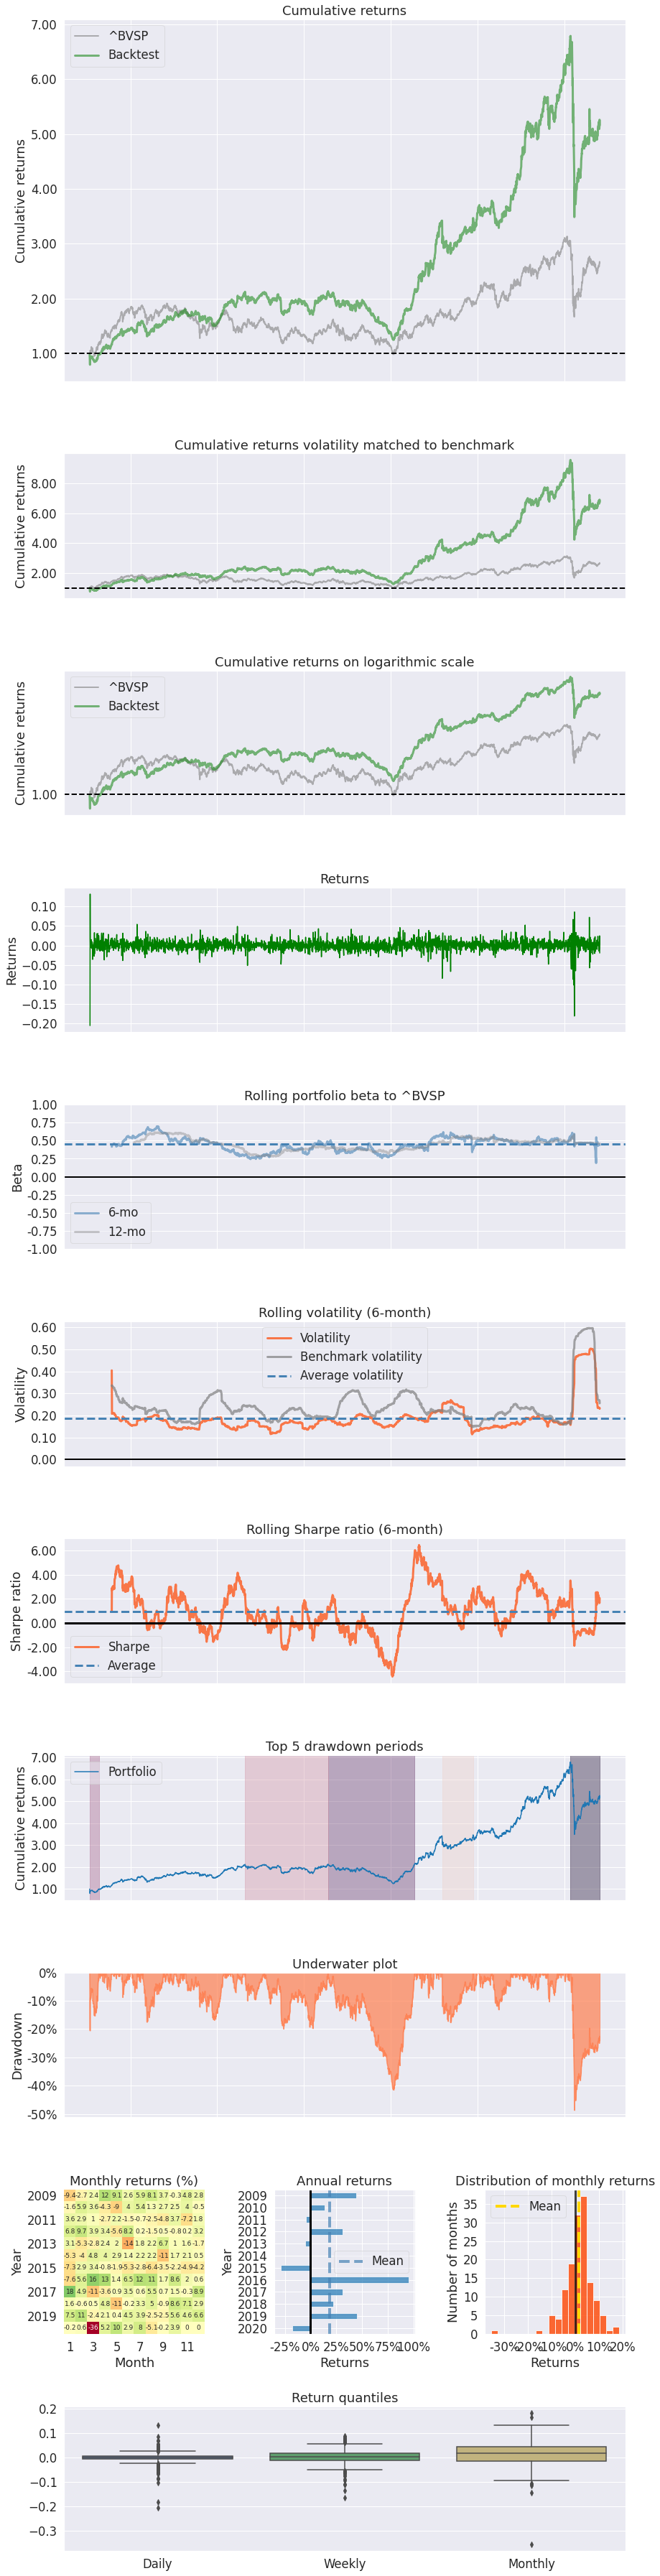

In [23]:
run(start=year[2009], tickers=graham_2009, display=True)

In [ ]:
run(start=year[2010], tickers=graham_2010, display=True)

In [ ]:
run(start=year[2011], tickers=graham_2011, display=True)

In [ ]:
run(start=year[2012], tickers=graham_2012, display=True)

In [ ]:
run(start=year[2013], tickers=graham_2013, display=True)

In [ ]:
run(start=year[2014], tickers=graham_2014, display=True)

In [ ]:
run(start=year[2015], tickers=graham_2015, display=True)

In [ ]:
run(start=year[2016], tickers=graham_2016, display=True)

In [ ]:
run(start=year[2017], tickers=graham_2017, display=True)

In [ ]:
run(start=year[2018], tickers=graham_2018, display=True)

In [ ]:
run(start=year[2019], tickers=graham_2019, display=True)

# 5.2. Décio Bazin

In [ ]:
run(start=year[2008], tickers=bazin_2008, display=True)

[*********************100%***********************]  11 of 11 completed

Valorizações na Carteira...
                ETER3.SA     FESA4.SA  ...          saldo   retorno
Date                                  ...                         
2009-01-23  1000.000000  1000.000000  ...   10000.000000       NaN
2009-01-26  1010.972591  1014.778499  ...    8980.408774 -0.101959
2009-01-27  1012.800491  1082.101889  ...   10034.539168  0.117381
2009-01-28  1020.111136  1067.323325  ...   10110.051917  0.007525
2009-01-29  1005.483360  1059.113540  ...    9949.123022 -0.015918
...                 ...          ...  ...            ...       ...
2020-10-19   644.314481  5053.560242  ...  128351.439161  0.010543
2020-10-20   647.178098  5072.661088  ...  130035.479643  0.013121
2020-10-21   628.564552  5132.692392  ...  130491.772845  0.003509
2020-10-22   614.962388  5116.320313  ...  131821.872562  0.010193
2020-10-23   683.689269  5288.228447  ...  132926.409360  0.008379

[2916 rows x 12 columns]
Mo

Start date,2009-01-23
End date,2020-10-23
Total months,138
,Backtest
Annual return,25.055%
Cumulative returns,1229.264%
Annual volatility,25.208%
Sharpe ratio,1.01
Calmar ratio,0.56
Stability,0.94
Max drawdown,-44.429%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.43,2020-01-23,2020-03-23,NaT,NaN
1,30.71,2009-12-24,2010-05-20,2012-02-15,560
2,23.78,2013-05-22,2014-03-17,2015-04-24,503
3,22.28,2018-01-26,2018-09-13,2018-12-28,241
4,21.39,2015-05-15,2016-01-21,2016-06-21,288


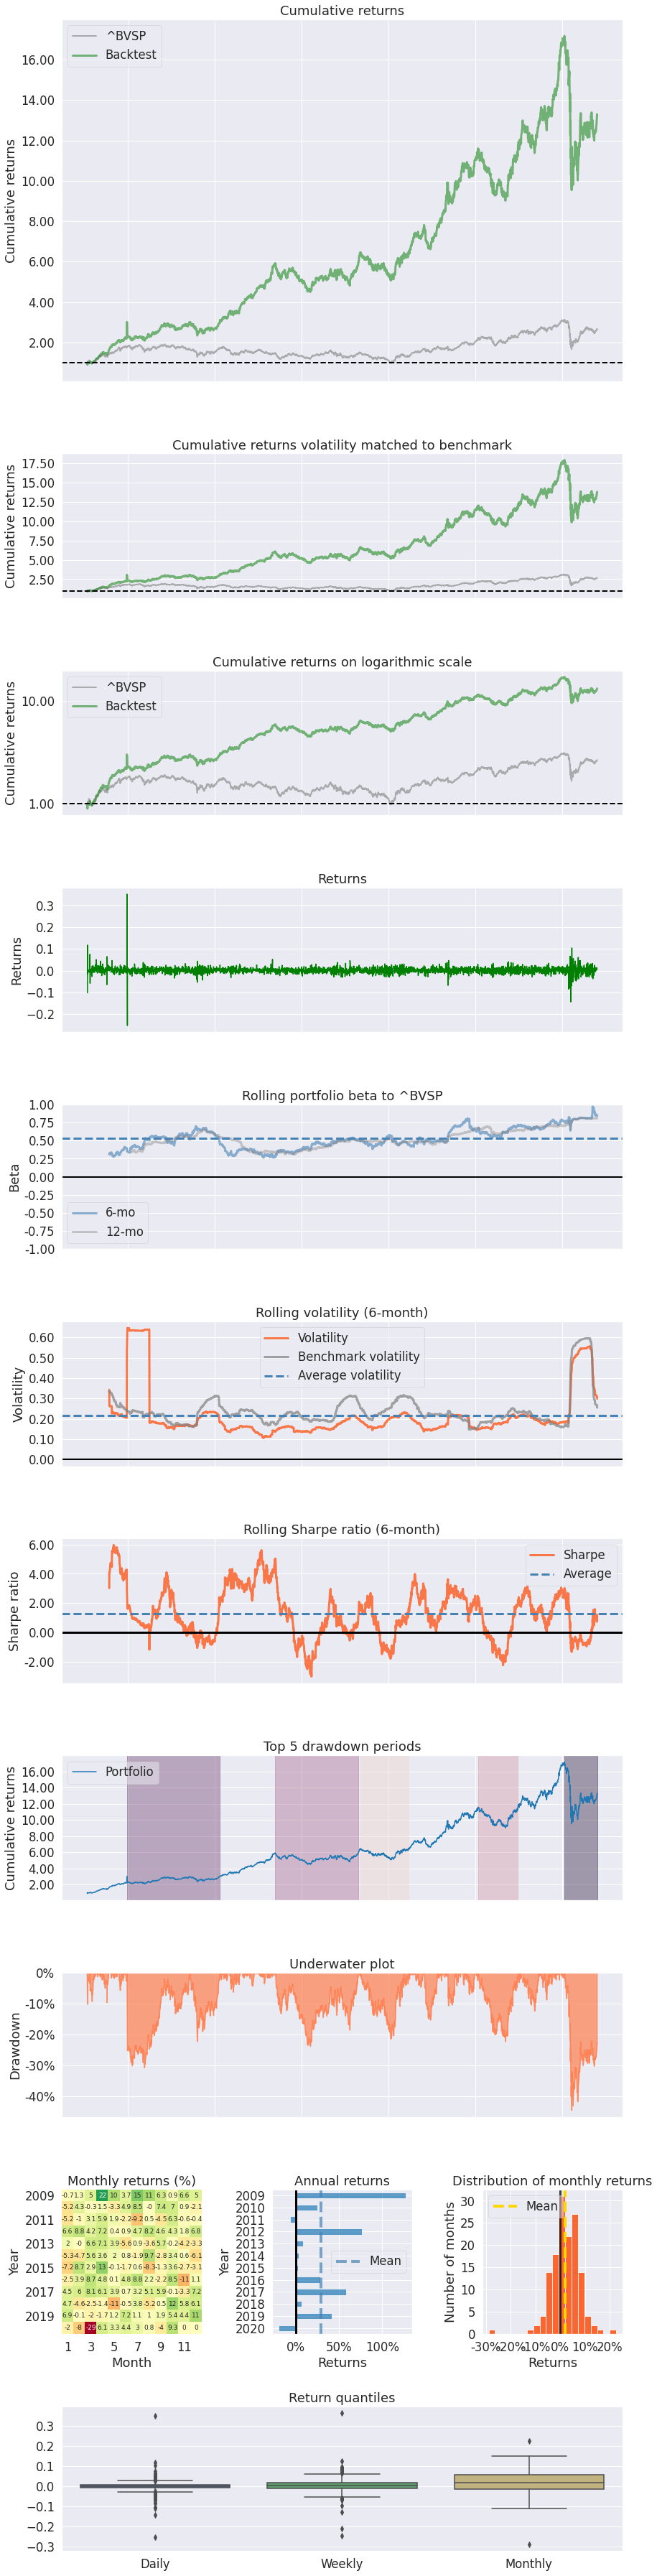

In [24]:
run(start=year[2009], tickers=bazin_2009, display=True)

In [ ]:
run(start=year[2010], tickers=bazin_2010, display=True)

In [ ]:
run(start=year[2011], tickers=bazin_2011, display=True)

In [ ]:
run(start=year[2012], tickers=bazin_2012, display=True)

In [ ]:
run(start=year[2013], tickers=bazin_2013, display=True)

In [ ]:
run(start=year[2014], tickers=bazin_2014, display=True)

In [ ]:
run(start=year[2015], tickers=bazin_2015, display=True)

In [ ]:
run(start=year[2016], tickers=bazin_2016, display=True)

In [ ]:
run(start=year[2017], tickers=bazin_2017, display=True)

In [ ]:
run(start=year[2018], tickers=bazin_2018, display=True)

In [ ]:
run(start=year[2019], tickers=bazin_2019, display=True)

# 5.3. Joel Greenblatt

In [ ]:
run(start=year[2008], tickers=greenblatt_2008, display=True)

[*********************100%***********************]  11 of 11 completed

Valorizações na Carteira...
                CEBR3.SA      CEBR5.SA  ...         saldo   retorno
Date                                   ...                        
2009-01-23  1000.000000   1000.000000  ...  10000.000000       NaN
2009-01-26  1000.000000    981.735280  ...   8975.538915 -0.102446
2009-01-27  1000.000000    981.735280  ...   9028.916253  0.005947
2009-01-28  1000.000000    958.904200  ...   9063.971927  0.003883
2009-01-29  1052.631448    958.904200  ...   8903.599791 -0.017693
...                 ...           ...  ...           ...       ...
2020-10-19  5924.601296  10813.235029  ...  47724.955884  0.001660
2020-10-20  5927.202432   9674.999763  ...  46023.509679 -0.035651
2020-10-21  6080.015558  10612.146538  ...  48175.420683  0.046757
2020-10-22  5949.961749  10604.558853  ...  47856.835017 -0.006613
2020-10-23  5949.961749   9675.948495  ...  46680.927183 -0.024571

[2990 rows x 12 columns]
Mo

Start date,2009-01-23
End date,2020-10-23
Total months,142
,Backtest
Annual return,13.866%
Cumulative returns,366.809%
Annual volatility,22.32%
Sharpe ratio,0.69
Calmar ratio,0.21
Stability,0.12
Max drawdown,-65.528%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,65.53,2013-05-28,2016-02-15,2019-01-03,1463
1,45.53,2020-01-22,2020-03-23,2020-09-29,180
2,27.19,2010-12-01,2011-08-08,2012-03-13,335
3,23.01,2009-01-23,2009-03-31,2009-05-06,74
4,20.90,2012-04-02,2012-06-05,2013-05-02,284


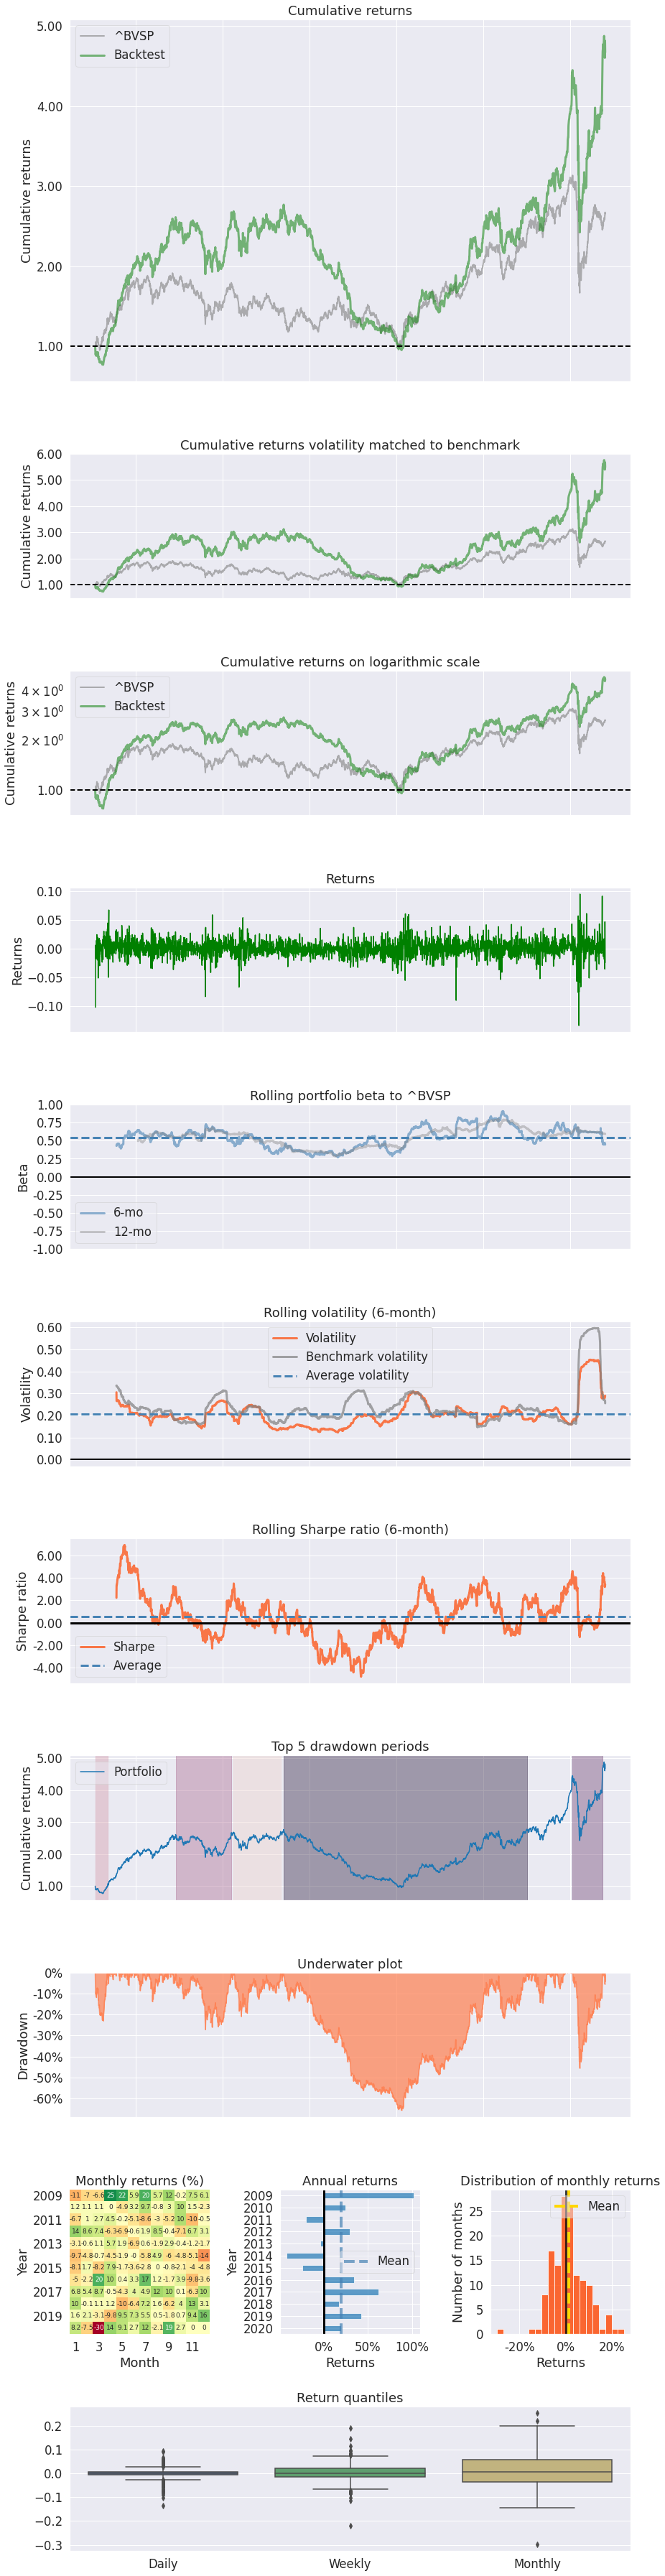

In [25]:
run(start=year[2009], tickers=greenblatt_2009, display=True)

In [ ]:
run(start=year[2010], tickers=greenblatt_2010, display=True)

In [ ]:
run(start=year[2011], tickers=greenblatt_2011, display=True)

In [ ]:
run(start=year[2012], tickers=greenblatt_2012, display=True)

In [ ]:
run(start=year[2013], tickers=greenblatt_2013, display=True)

In [ ]:
run(start=year[2014], tickers=greenblatt_2014, display=True)

In [ ]:
run(start=year[2015], tickers=greenblatt_2015, display=True)

In [ ]:
run(start=year[2016], tickers=greenblatt_2016, display=True)

In [ ]:
run(start=year[2017], tickers=greenblatt_2017, display=True)

In [ ]:
run(start=year[2018], tickers=greenblatt_2018, display=True)

In [ ]:
run(start=year[2019], tickers=greenblatt_2019, display=True)

# 5.4. Joseph D. Piotroski

In [ ]:
run(start=year[2008], tickers=piotroski_2008, display=True)

[*********************100%***********************]  11 of 11 completed

Valorizações na Carteira...
                BBDC3.SA     BBDC4.SA  ...         saldo   retorno
Date                                  ...                        
2009-01-23  1000.000000  1000.000000  ...  10000.000000       NaN
2009-01-26   991.848053  1001.419048  ...   8901.592685 -0.109841
2009-01-27   988.043778   982.009843  ...   8860.712984 -0.004592
2009-01-28  1011.412725  1027.466457  ...   8994.117671  0.015056
2009-01-29   989.131277   996.688399  ...   8041.138044 -0.105956
...                 ...          ...  ...           ...       ...
2020-10-19  4009.448141  2646.923134  ...  48338.244518  0.001250
2020-10-20  4158.024999  2761.224925  ...  48786.793612  0.009279
2020-10-21  4196.230500  2789.479231  ...  48782.033780 -0.000098
2020-10-22  4338.439640  2917.908298  ...  48539.024213 -0.004982
2020-10-23  4346.929526  2914.055582  ...  48196.765125 -0.007051

[2995 rows x 12 columns]
Montante Inicia

Start date,2009-01-23
End date,2020-10-23
Total months,142
,Backtest
Annual return,14.148%
Cumulative returns,381.968%
Annual volatility,24.048%
Sharpe ratio,0.67
Calmar ratio,0.33
Stability,0.88
Max drawdown,-43.441%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,43.44,2020-01-23,2020-03-23,NaT,NaN
1,23.84,2017-10-10,2018-06-18,2019-01-02,322
2,23.50,2013-05-22,2016-01-21,2016-06-23,807
3,22.68,2009-01-23,2009-03-05,2009-04-08,54
4,21.74,2009-12-24,2010-05-20,2010-10-04,203


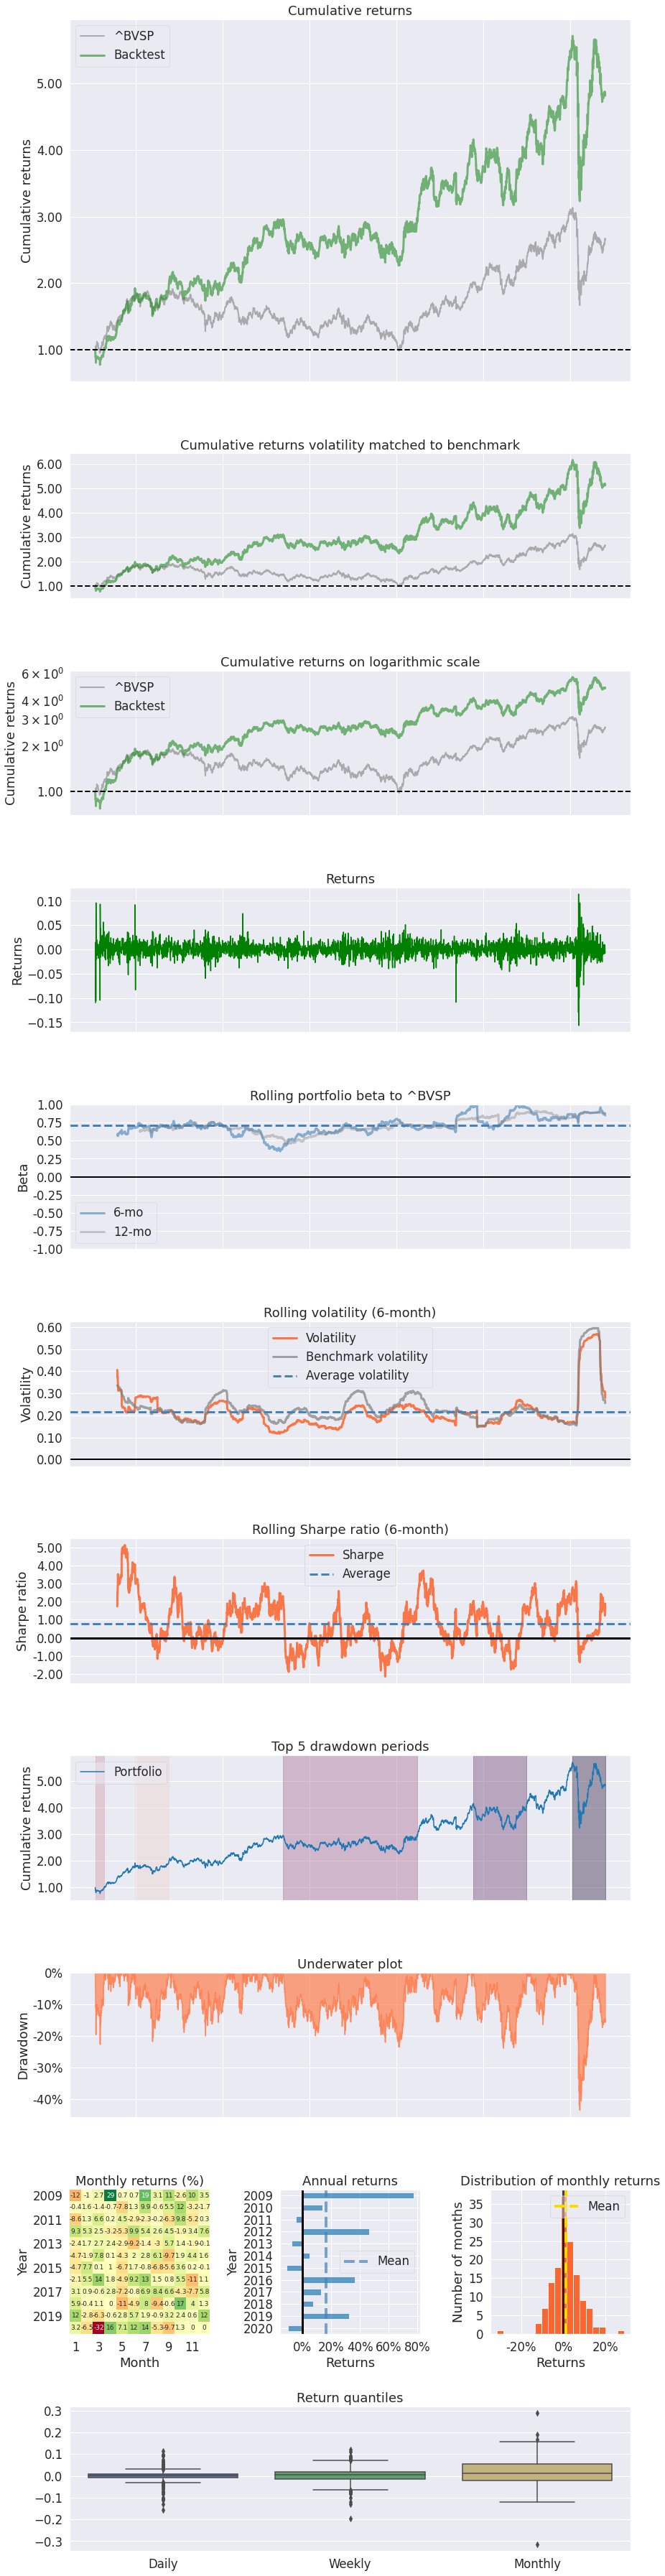

In [26]:
run(start=year[2009], tickers=piotroski_2009, display=True)

In [ ]:
run(start=year[2010], tickers=piotroski_2010, display=True)

In [ ]:
run(start=year[2011], tickers=piotroski_2011, display=True)

In [ ]:
run(start=year[2012], tickers=piotroski_2012, display=True)

In [ ]:
run(start=year[2013], tickers=piotroski_2013, display=True)

In [ ]:
run(start=year[2014], tickers=piotroski_2014, display=True)

In [ ]:
run(start=year[2015], tickers=piotroski_2015, display=True)

In [ ]:
run(start=year[2016], tickers=piotroski_2016, display=True)

In [ ]:
run(start=year[2017], tickers=piotroski_2017, display=True)

In [ ]:
run(start=year[2018], tickers=piotroski_2018, display=True)

In [ ]:
run(start=year[2019], tickers=piotroski_2019, display=True)